In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("data (1).csv")
pd.set_option('display.max_columns', None)

del df['Unnamed: 32']

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
X = df.iloc[:,2:].values
y = df.iloc[:,1].values

## Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

## splitting the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 0)


## feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Now that we have prepared data, we will import Keras and its packages.

In [10]:
import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [11]:
## Initializing the ANN
classifier = Sequential()

In [17]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(16, kernel_initializer='uniform', activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

In [18]:
## Adding the second hidden layer
classifier.add(Dense(16,kernel_initializer='uniform',activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

In [19]:
## Adding the output layer
classifier.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))

In [20]:
## Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [22]:
## fitting the ANN to the training set
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5547 - loss: 0.6929  
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6087 - loss: 0.6920 
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.6275 - loss: 0.6906
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.6365 - loss: 0.6885
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.6348 - loss: 0.6853
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.6195 - loss: 0.6808
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.6605 - loss: 0.6721
Epoch 8/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.7179 - loss: 0.6602
Epoch 9/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8042 - loss: 0.6443 
Epoch 10/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.9050 - loss: 0.6169
Epoch 11/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.9453 - loss: 0.5789
Epoch 12/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.9871 - loss: 0.0507
Epoch 70/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9850 - loss: 0.0674 
Epoch 71/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.9864 - loss: 0.0547
Epoch 72/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.9849 - loss: 0.0580
Epoch 73/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.9910 - loss: 0.0391
Epoch 74/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.9895 - loss: 0.0510
Epoch 75/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.9910 - loss: 0.0337
Epoch 76/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.9913 - loss: 0.0444
Epoch 77/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.9932 - loss: 0.0418
Epoch 78/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.9907 - loss: 0.0460
Epoch 79/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.9904 - loss: 0.0418
Epoch 80/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.99

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.9927 - loss: 0.0242
Epoch 138/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.9944 - loss: 0.0182
Epoch 139/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.9946 - loss: 0.0223
Epoch 140/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.9945 - loss: 0.0274
Epoch 141/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.9909 - loss: 0.0292
Epoch 142/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.9898 - loss: 0.0297
Epoch 143/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.9917 - loss: 0.0209
Epoch 144/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.9890 - loss: 0.0300
Epoch 145/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.9944 - loss: 0.0217
Epoch 146/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.9890 - loss: 0.0364
Epoch 147/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.9963 - loss: 0.0188
Epoch 148/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - ac

In [23]:
## Predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [24]:
## Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [25]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 94.73684210526315%


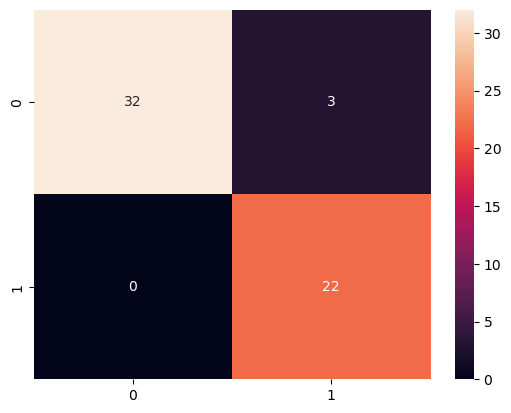

In [26]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')